In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
listing = pd.read_csv('berlin-airbnb-data/listings.csv') 

In [336]:
listing_summary = pd.read_csv('berlin-airbnb-data/listings_summary.csv') 

In [333]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22354 entries, 0 to 22551
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22354 non-null  int64  
 1   name                            22296 non-null  object 
 2   host_id                         22354 non-null  int64  
 3   host_name                       22329 non-null  object 
 4   neighbourhood_group             22354 non-null  object 
 5   neighbourhood                   22354 non-null  object 
 6   latitude                        22354 non-null  float64
 7   longitude                       22354 non-null  float64
 8   room_type                       22354 non-null  object 
 9   price                           22354 non-null  int64  
 10  minimum_nights                  22354 non-null  int64  
 11  number_of_reviews               22354 non-null  int64  
 12  last_review                     

In [334]:
listing.isna().sum()

id                                   0
name                                58
host_id                              0
host_name                           25
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3821
reviews_per_month                 3827
calculated_host_listings_count       0
availability_365                     0
distanceFromCenter                   0
dtype: int64

In [6]:
listing = listing.drop(['name', 'host_name'], axis =1)

In [7]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   host_id                         22552 non-null  int64  
 2   neighbourhood_group             22552 non-null  object 
 3   neighbourhood                   22552 non-null  object 
 4   latitude                        22552 non-null  float64
 5   longitude                       22552 non-null  float64
 6   room_type                       22552 non-null  object 
 7   price                           22552 non-null  int64  
 8   minimum_nights                  22552 non-null  int64  
 9   number_of_reviews               22552 non-null  int64  
 10  last_review                     18644 non-null  object 
 11  reviews_per_month               18638 non-null  float64
 12  calculated_host_listings_count  

In [128]:
listing =listing.dropna(axis=0, subset=['last_review'])

In [129]:
listing.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 6
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [131]:
listing['reviews_per_month']=listing['reviews_per_month'].fillna('0')

In [132]:
listing.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [38]:
listing.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


In [123]:
listing.describe(include=["object", "bool"])

,neighbourhood_group,neighbourhood,room_type,last_review,reviews_per_month
count,18644,18644,18644,18644,18644.00
unique,12,136,3,1312,769.00
top,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,Private room,2018-11-04,0.03
freq,4603,1095,9561,618,624.00


In [34]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.barplot(data = listing, y = "price", x = "distanceFromCenter", hue = "neighbourhood_group")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbf6b373310> (for post_execute):


KeyboardInterrupt: 

In [68]:
listing[listing.minimum_nights > 100].count()
listing = listing[listing.minimum_nights <=100]

In [54]:
listing = listing[listing.price != 0 ]
listing = listing[listing.price <=500]

In [187]:
listing.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,2217,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,2986,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,3718,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,4108,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,17391,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

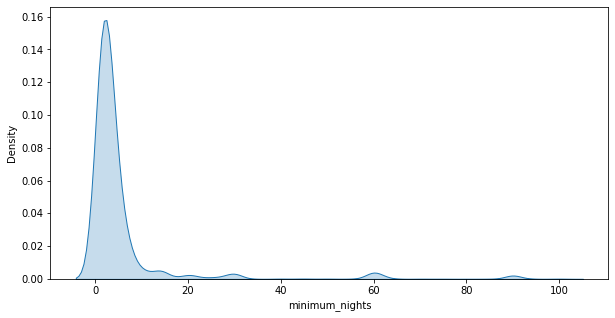

In [69]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.kdeplot(x=listing.minimum_nights,shade = True)

In [189]:
listing.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,1.860200e+04,1.860200e+04,18602.000000,18602.000000,18602.000000,18602.000000,18602.00000,18602.000000,18602.000000
mean,1.527064e+07,5.187688e+07,52.509911,13.406379,57.796097,6.533706,21.58569,1.925008,83.976132
std,8.454227e+06,5.653927e+07,0.030546,0.057218,42.898898,43.139033,39.45500,3.755471,120.346957
min,2.015000e+03,2.217000e+03,52.345803,13.103557,1.000000,1.000000,1.00000,1.000000,0.000000
25%,7.792106e+06,8.598285e+06,52.489147,13.376457,30.000000,2.000000,3.00000,1.000000,0.000000
50%,1.641244e+07,2.900256e+07,52.509195,13.416921,45.000000,2.000000,7.00000,1.000000,8.000000
75%,2.217749e+07,7.707587e+07,52.532644,13.439125,70.000000,4.000000,21.00000,1.000000,143.000000
max,2.984956e+07,2.242958e+08,52.641499,13.757642,500.000000,5000.000000,498.00000,45.000000,365.000000


In [79]:
!pip install geopy
import geopy.distance

def distance_center(row): 
    berlin_coords = (52.520008, 13.404954)
    listing_coords = (row['latitude'],row['longitude'])
    return geopy.distance.distance(listing_coords, berlin_coords).km
    
    
listing['distanceFromCenter'] = listing.apply(lambda row: distance_center(row), axis=1)

In [80]:
listing['distanceFromCenter']

0        1.624949
1        3.172058
2        1.875055
3        4.465424
4        2.666263
           ...   
22547    1.568375
22548    5.043354
22549    1.396570
22550    1.785105
22551    5.313712
Name: distanceFromCenter, Length: 22354, dtype: float64

<AxesSubplot:>

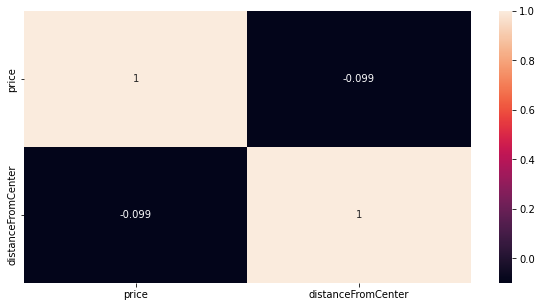

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_price.corr(), annot=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


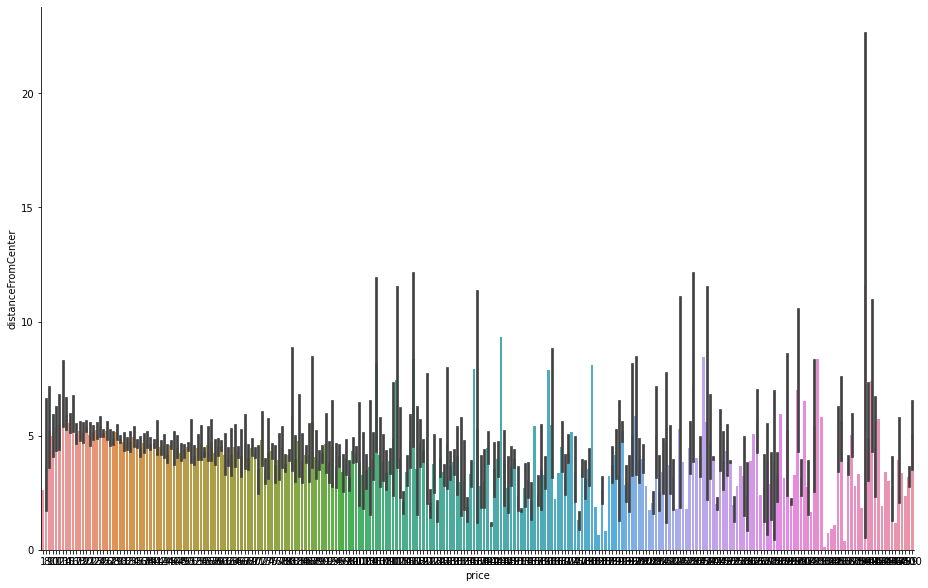

In [332]:

sns.catplot(ax = ax,y="distanceFromCenter", x = "price",
            data = listing, kind = 'bar',height=8.27, aspect=13/8.27)


<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

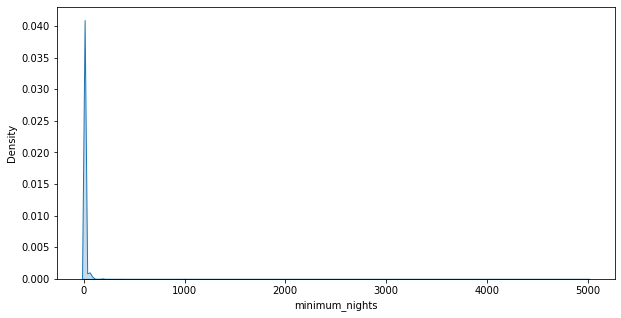

In [212]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=listing.minimum_nights, shade=True)

In [217]:
len(listing[listing.minimum_nights >=90])

158

In [213]:
listing = listing[listing.minimum_nights <=100]

<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

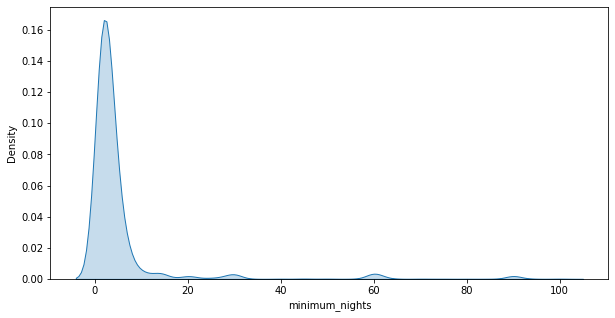

In [218]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=listing.minimum_nights, shade=True)

In [215]:
listing.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,1.853300e+04,1.853300e+04,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000
mean,1.529450e+07,5.198673e+07,52.509899,13.406387,57.821346,5.394971,21.607511,1.923380,83.581773
std,8.445724e+06,5.657383e+07,0.030556,0.057223,42.923333,11.936606,39.499887,3.758817,120.178139
min,2.015000e+03,2.217000e+03,52.345803,13.103557,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7.803661e+06,8.651009e+06,52.489125,13.376485,30.000000,2.000000,3.000000,1.000000,0.000000
50%,1.643285e+07,2.914680e+07,52.509184,13.416933,46.000000,2.000000,7.000000,1.000000,8.000000
75%,2.218448e+07,7.726179e+07,52.532637,13.439135,70.000000,4.000000,21.000000,1.000000,142.000000
max,2.984956e+07,2.242958e+08,52.641499,13.757642,500.000000,100.000000,498.000000,45.000000,365.000000


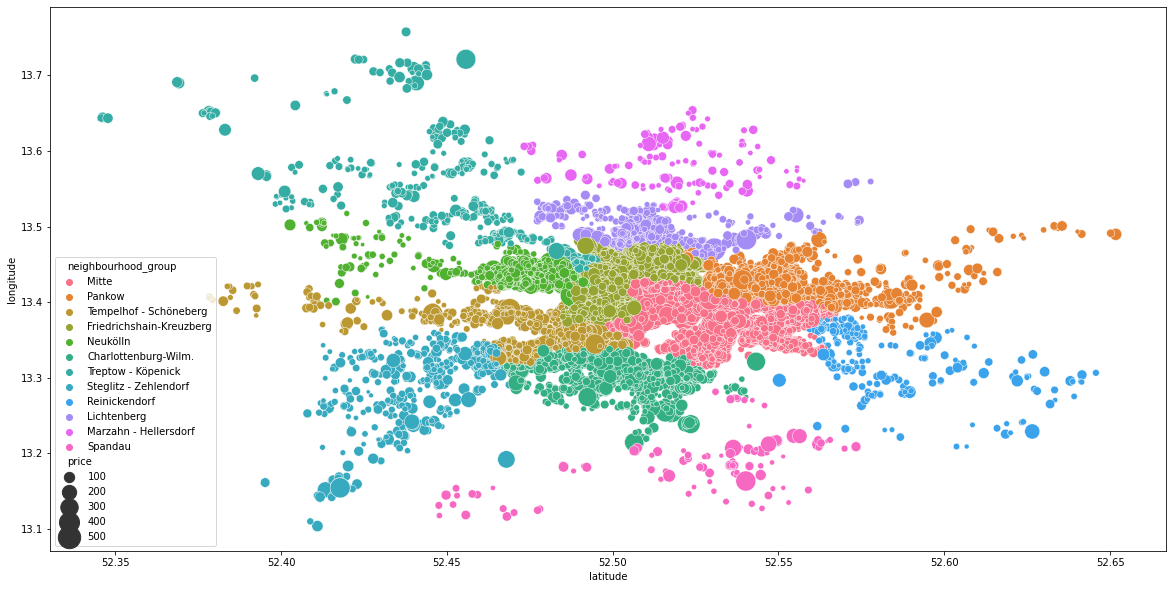

In [131]:
plt.figure(figsize=(20,10))

sns.scatterplot(x=listing['latitude'], y=listing['longitude'],hue = listing['neighbourhood_group'], size=listing["price"],
  sizes=(10, 500),
                color=sns.color_palette('winter', n_colors=1))
plt.show()

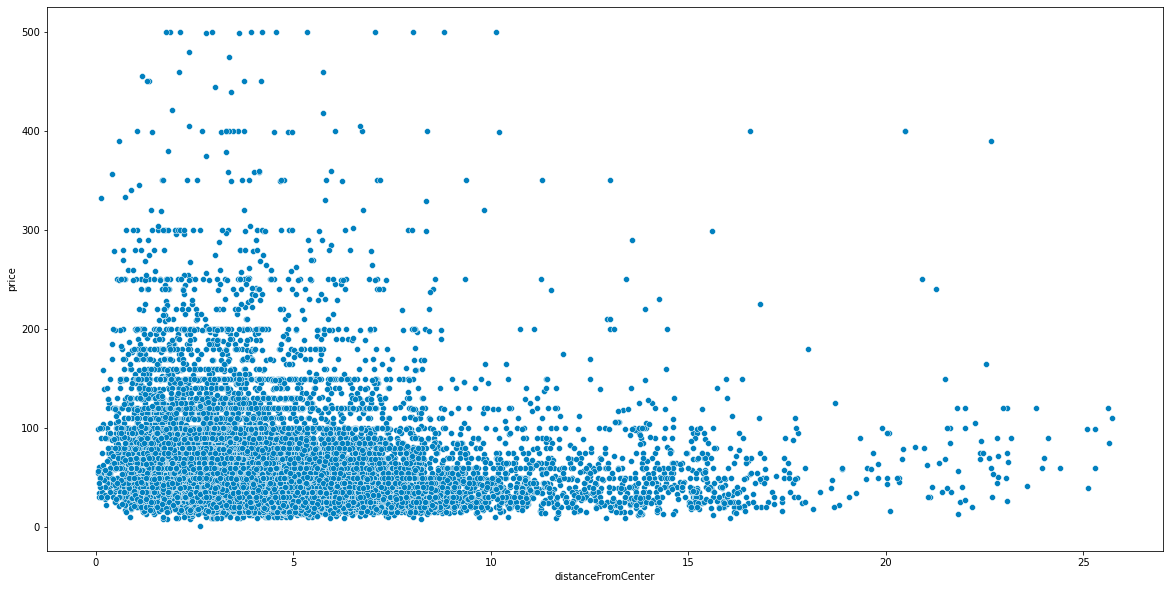

In [142]:
plt.figure(figsize=(20,10))

sns.scatterplot(x=listing['distanceFromCenter'], y=listing['price'],
                color=sns.color_palette('winter', n_colors=1))
plt.show()

In [241]:
listing_90= listing[listing.price <=90]

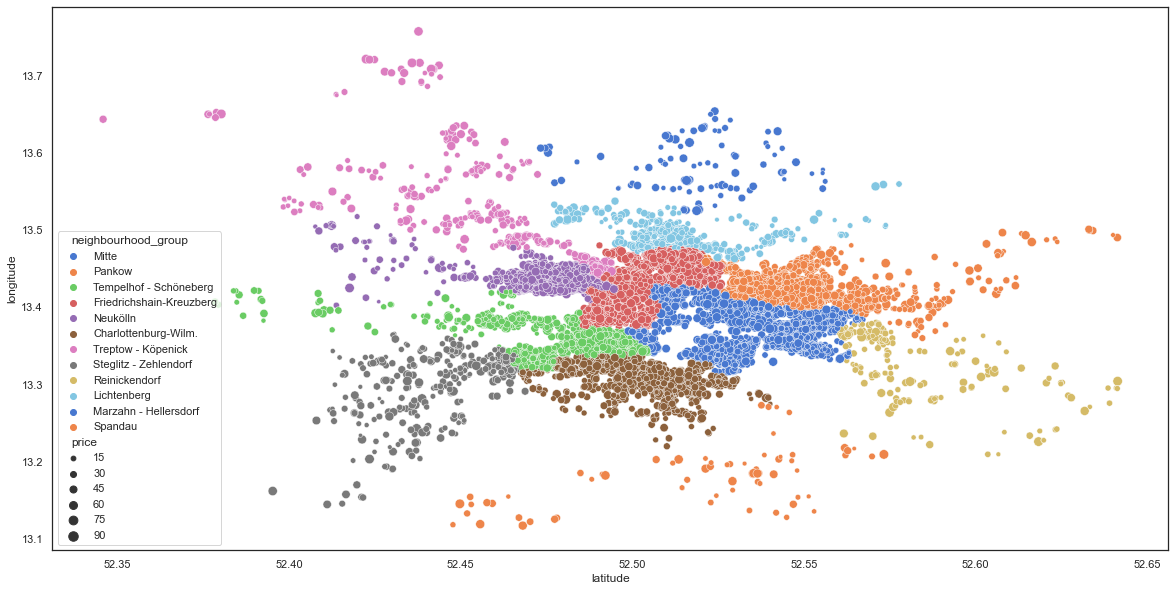

In [242]:
plt.figure(figsize=(20,10))
sns.set_theme(style="white")
sns.scatterplot(x=listing_90['latitude'], y=listing_90['longitude'],
            hue = listing_90['neighbourhood_group'], size = listing_90['price'] 
               ,palette="muted", sizes = (10,90))
plt.show()

In [245]:
listing.neighbourhood_group.value_counts()

Friedrichshain-Kreuzberg    4583
Mitte                       3805
Pankow                      2935
Neukölln                    2906
Tempelhof - Schöneberg      1276
Charlottenburg-Wilm.        1272
Lichtenberg                  526
Treptow - Köpenick           476
Steglitz - Zehlendorf        349
Reinickendorf                199
Marzahn - Hellersdorf        112
Spandau                       94
Name: neighbourhood_group, dtype: int64

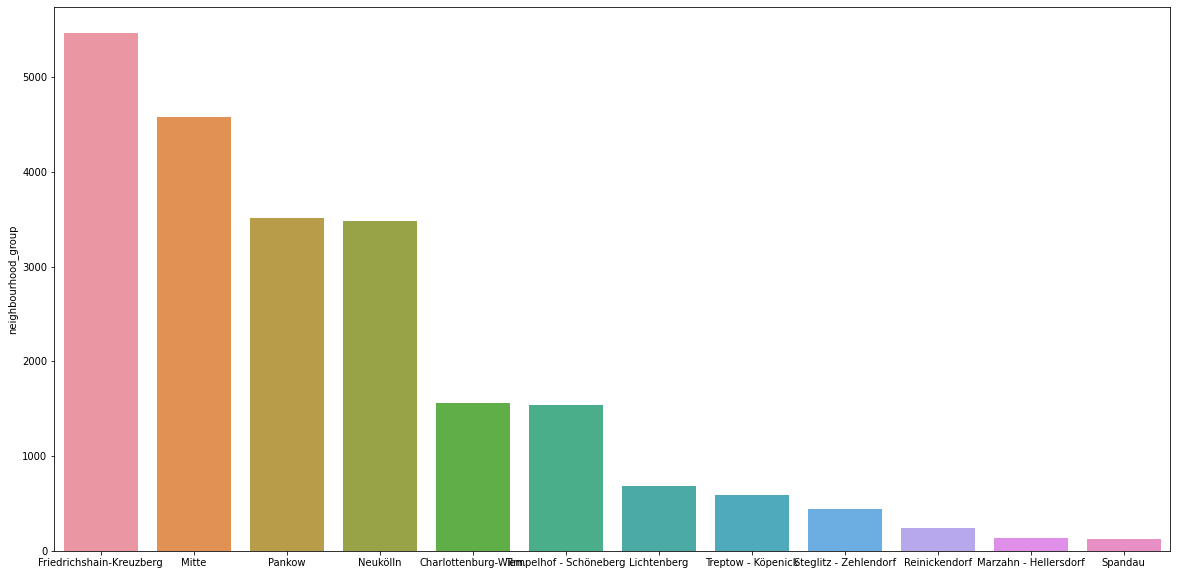

In [108]:
plt.figure(figsize=(20,10))
sns.barplot(x=listing.neighbourhood_group.value_counts().index ,y =listing.neighbourhood_group.value_counts())
plt.savefig('neighbour_group')

In [337]:
listing_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   listing_url                       22552 non-null  object 
 2   scrape_id                         22552 non-null  int64  
 3   last_scraped                      22552 non-null  object 
 4   name                              22493 non-null  object 
 5   summary                           21589 non-null  object 
 6   space                             14020 non-null  object 
 7   description                       22349 non-null  object 
 8   experiences_offered               22552 non-null  object 
 9   neighborhood_overview             11540 non-null  object 
 10  notes                             7215 non-null   object 
 11  transit                           13036 non-null  object 
 12  acce

In [255]:
listing_summary['price']=listing_summary['price'].str.replace('$','')
listing_summary['price']=listing_summary['price'].str.replace(',','')

<ipython-input-255-497556070e3e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing_summary['price']=listing_summary['price'].str.replace('$','')


In [256]:
listing_summary['price']= listing_summary['price'].astype('float64')

In [257]:
listing_summary['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='square_feet', ylabel='Density'>

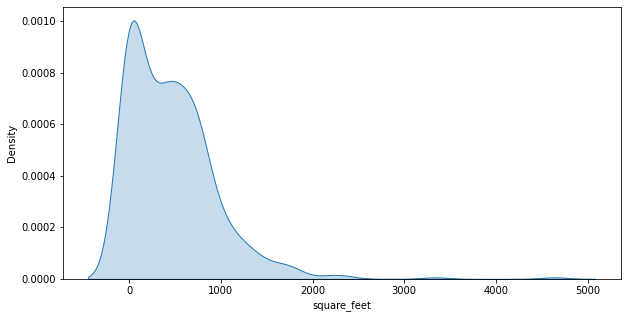

In [258]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=listing_summary.square_feet, shade=True)

In [259]:
listing_summary = listing_summary[listing_summary.price != 0 ]
listing_summary = listing_summary[listing_summary.price <=500]

In [260]:
listing_summary['price'].describe()

count    22470.000000
mean        58.117980
std         44.687913
min          1.000000
25%         30.000000
50%         45.000000
75%         70.000000
max        500.000000
Name: price, dtype: float64

<AxesSubplot:>

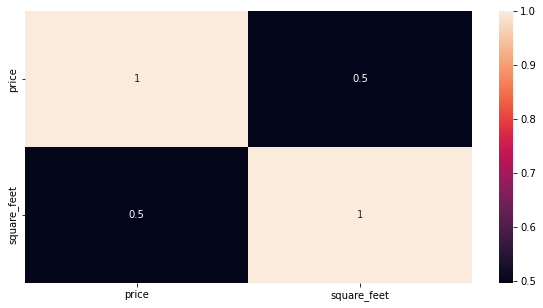

In [261]:
temp = listing_summary.loc[:,['price','square_feet']]
plt.figure(figsize=(10,5))
sns.heatmap(data=temp.corr(), annot=True)

<AxesSubplot:>

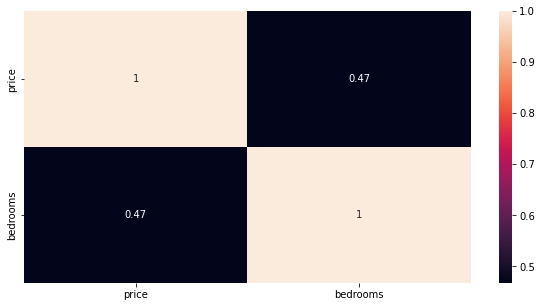

In [262]:
temp = listing_summary.loc[:,['price','bedrooms']]
plt.figure(figsize=(10,5))
sns.heatmap(data=temp.corr(), annot=True)

In [335]:
listing_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22367 entries, 0 to 22551
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22367 non-null  int64  
 1   host_is_superhost                 22367 non-null  object 
 2   host_total_listings_count         22367 non-null  float64
 3   host_has_profile_pic              22367 non-null  object 
 4   host_identity_verified            22367 non-null  object 
 5   neighbourhood_cleansed            22367 non-null  object 
 6   neighbourhood_group_cleansed      22367 non-null  object 
 7   latitude                          22367 non-null  float64
 8   longitude                         22367 non-null  float64
 9   room_type                         22367 non-null  object 
 10  accommodates                      22367 non-null  int64  
 11  bathrooms                         22367 non-null  float64
 12  bedr

In [263]:
listing_summary = listing_summary.drop(['thumbnail_url', 'medium_url','xl_picture_url','host_acceptance_rate'
                                        ,'jurisdiction_names','name'], axis=1)

In [477]:
listing_summary.isna().sum()

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
summary                               937
space                                8515
description                           202
experiences_offered                     0
neighborhood_overview               10965
notes                               15284
transit                              9473
access                              11665
interaction                         12121
house_rules                         11077
picture_url                             0
host_id                                 0
host_url                                0
host_name                              25
host_since                             25
host_location                         114
host_about                          11337
host_response_time                  12859
host_response_rate                  12860
host_is_superhost                 

In [264]:
listing_summary.drop(['street', 'neighbourhood', 'city', 'state', 'smart_location', 'host_id', 'square_feet', 'monthly_price', 'license', 'weekly_price' , 'square_feet', 'monthly_price', 'license', 'weekly_price',
                      'listing_url', 'scrape_id', 'last_scraped', 'experiences_offered', 'picture_url', 'host_url',
                      'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                      'host_listings_count', 'host_verifications', 'country_code', 'country', 
                      'calendar_last_scraped', 'first_review', 'last_review', 'calendar_updated', 
                      'has_availability', 'market', 'host_response_rate', 'host_response_time',
                      'property_type', 'is_location_exact', 'requires_license', 'is_business_travel_ready', 'zipcode', 'bed_type'], axis=1, inplace=True)

In [479]:
listing_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22470 entries, 0 to 22551
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22470 non-null  int64  
 1   summary                           21533 non-null  object 
 2   space                             13955 non-null  object 
 3   description                       22268 non-null  object 
 4   neighborhood_overview             11505 non-null  object 
 5   notes                             7186 non-null   object 
 6   transit                           12997 non-null  object 
 7   access                            10805 non-null  object 
 8   interaction                       10349 non-null  object 
 9   house_rules                       11393 non-null  object 
 10  host_since                        22445 non-null  object 
 11  host_location                     22356 non-null  object 
 12  host

In [265]:
listing_summary.drop([ 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access',
         'interaction', 'house_rules'], axis=1, inplace=True)

In [199]:
listing_summary.isna().sum()

id                                     0
host_since                            25
host_location                        114
host_is_superhost                     25
host_total_listings_count             25
host_has_profile_pic                  25
host_identity_verified                25
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
latitude                               0
longitude                              0
room_type                              0
accommodates                           0
bathrooms                             32
bedrooms                              18
beds                                  38
amenities                              0
price                                  0
security_deposit                    9335
cleaning_fee                        7098
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
availability_30 

In [266]:
listing_summary['cleaning_fee'].fillna('$0.00',inplace=True)
listing_summary['security_deposit'].fillna('$0.00',inplace=True)

In [267]:

listing_summary['cleaning_fee']=listing_summary['cleaning_fee'].replace('$','')
listing_summary['cleaning_fee']=listing_summary['cleaning_fee'].replace(',','')

listing_summary['security_deposit']=listing_summary['security_deposit'].replace('$','')
listing_summary['security_deposit']=listing_summary['security_deposit'].replace(',','')

listing_summary['extra_people']=listing_summary['extra_people'].replace('$','')
listing_summary['extra_people']=listing_summary['extra_people'].replace(',','')

In [268]:

listing_summary['cleaning_fee']= listing_summary['price'].astype('float64')
listing_summary['security_deposit']= listing_summary['price'].astype('float64')
listing_summary['extra_people']= listing_summary['price'].astype('float64')

In [269]:
listing_summary.isna().sum()

id                                     0
host_since                            25
host_location                        114
host_is_superhost                     25
host_total_listings_count             25
host_has_profile_pic                  25
host_identity_verified                25
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
latitude                               0
longitude                              0
room_type                              0
accommodates                           0
bathrooms                             32
bedrooms                              18
beds                                  38
amenities                              0
price                                  0
security_deposit                       0
cleaning_fee                           0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
availability_30 

In [270]:
listing_summary =listing_summary.dropna(axis=0, subset=['host_since'])

In [271]:
listing_summary['bedrooms'].value_counts()

1.0     17098
2.0      2956
0.0      1474
3.0       712
4.0       140
5.0        29
6.0        10
8.0         3
7.0         3
10.0        1
9.0         1
Name: bedrooms, dtype: int64

In [272]:
listing_summary['host_location'].fillna('Germany', inplace = True)

In [273]:
listing_summary =listing_summary.dropna(axis=0, subset=['bedrooms'])
listing_summary =listing_summary.dropna(axis=0, subset=['bathrooms'])
listing_summary =listing_summary.dropna(axis=0, subset=['beds'])

In [274]:
listing_summary.isna().sum()

id                                     0
host_since                             0
host_location                          0
host_is_superhost                      0
host_total_listings_count              0
host_has_profile_pic                   0
host_identity_verified                 0
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
latitude                               0
longitude                              0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms                               0
beds                                   0
amenities                              0
price                                  0
security_deposit                       0
cleaning_fee                           0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
availability_30 

In [275]:
listing_summary.head()

,id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2008-08-18,"Key Biscayne, Florida, United States",t,4.0,t,t,Brunnenstr. Süd,Mitte,52.534537,...,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2008-09-16,"Berlin, Berlin, Germany",f,1.0,t,t,Prenzlauer Berg Nordwest,Pankow,52.548513,...,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.42
2,3176,2008-10-19,"Coledale, New South Wales, Australia",f,1.0,t,t,Prenzlauer Berg Südwest,Pankow,52.534996,...,9.0,9.0,10.0,9.0,t,strict_14_with_grace_period,f,f,1,1.25
3,3309,2008-11-07,"Berlin, Berlin, Germany",f,1.0,t,t,Schöneberg-Nord,Tempelhof - Schöneberg,52.498855,...,9.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2009-05-16,"Berlin, Berlin, Germany",t,1.0,t,t,Helmholtzplatz,Pankow,52.543157,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.75


In [276]:
listing_summary.drop(['review_scores_value', 'review_scores_checkin', 'review_scores_location', 'review_scores_communication'\
         , 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_rating', 'reviews_per_month'], axis=1, inplace=True)

In [277]:
listing_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22367 entries, 0 to 22551
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22367 non-null  int64  
 1   host_since                        22367 non-null  object 
 2   host_location                     22367 non-null  object 
 3   host_is_superhost                 22367 non-null  object 
 4   host_total_listings_count         22367 non-null  float64
 5   host_has_profile_pic              22367 non-null  object 
 6   host_identity_verified            22367 non-null  object 
 7   neighbourhood_cleansed            22367 non-null  object 
 8   neighbourhood_group_cleansed      22367 non-null  object 
 9   latitude                          22367 non-null  float64
 10  longitude                         22367 non-null  float64
 11  room_type                         22367 non-null  object 
 12  acco

In [278]:
listing_summary['amenities']= listing_summary['amenities'].map(lambda x: x.lstrip('{'))
listing_summary['amenities']= listing_summary['amenities'].map(lambda x: x.lstrip('{'))
listing_summary['amenities']= listing_summary['amenities'].str.replace('"','')
listing_summary['numberOfAmenities'] = listing_summary['amenities'].map(lambda x: len(x.split(',')))

In [279]:
listing_summary['amenities'].head()

0    TV,Cable TV,Wifi,Kitchen,Gym,Heating,Family/ki...
1    Wifi,Kitchen,Elevator,Heating,Washer,Essential...
2    Internet,Wifi,Kitchen,Buzzer/wireless intercom...
3    Internet,Wifi,Pets allowed,Pets live on this p...
4    Wifi,Heating,Family/kid friendly,Essentials,Sh...
Name: amenities, dtype: object

In [280]:
listing_summary.drop(['amenities'], axis= 1, inplace = True)

In [281]:
listing_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22367 entries, 0 to 22551
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22367 non-null  int64  
 1   host_since                        22367 non-null  object 
 2   host_location                     22367 non-null  object 
 3   host_is_superhost                 22367 non-null  object 
 4   host_total_listings_count         22367 non-null  float64
 5   host_has_profile_pic              22367 non-null  object 
 6   host_identity_verified            22367 non-null  object 
 7   neighbourhood_cleansed            22367 non-null  object 
 8   neighbourhood_group_cleansed      22367 non-null  object 
 9   latitude                          22367 non-null  float64
 10  longitude                         22367 non-null  float64
 11  room_type                         22367 non-null  object 
 12  acco

In [282]:
import numpy as np


In [283]:
pd.to_datetime('today')

Timestamp('2021-10-07 17:55:02.373896')

In [284]:
listing_summary['host_since'] = (pd.to_datetime(listing_summary['host_since'], format='%Y-%m-%d'))

In [285]:
listing_summary['host_total_months'] = ((pd.to_datetime('today') - listing_summary['host_since'])/np.timedelta64(1, 'M')).astype(int)

In [286]:
listing_summary.drop(['host_since'], axis= 1, inplace = True)
listing_summary.drop(['host_location'], axis= 1, inplace = True)

In [287]:
listing_summary['distanceFromCenter'] = listing_summary.apply(lambda row: distance_center(row), axis=1)

<AxesSubplot:>

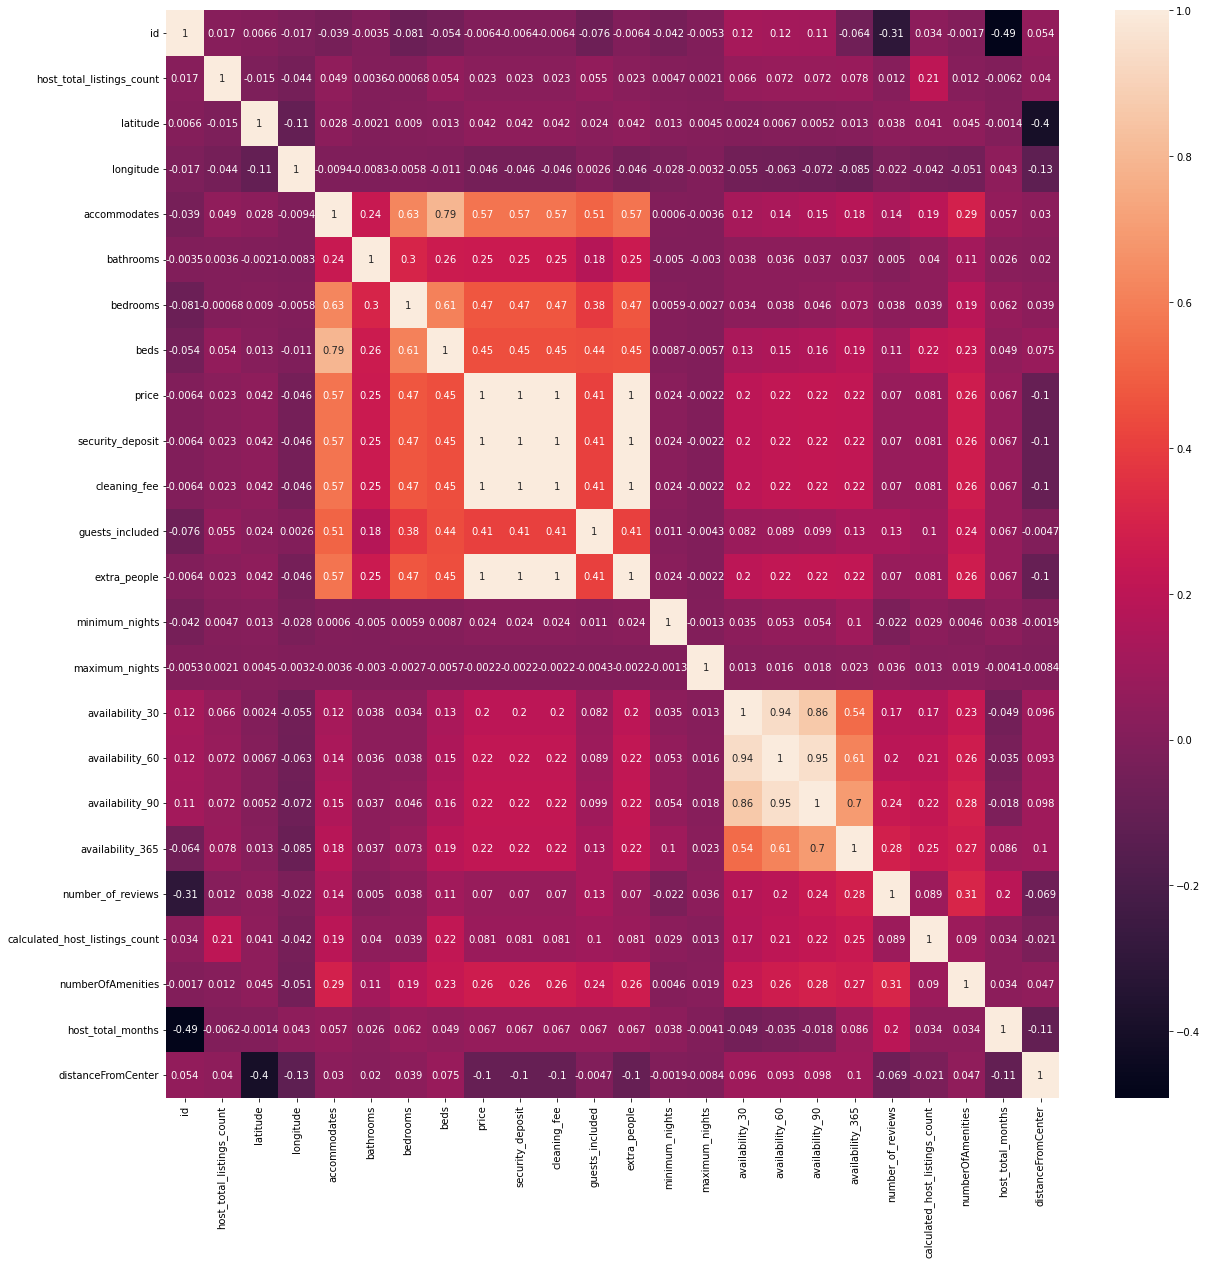

In [288]:
plt.figure(figsize=(20,20))
sns.heatmap(data=listing_summary.corr(), annot=True)

In [289]:
X= listing_summary
y= listing_summary.price

In [290]:
X.drop(['price'], axis= 1, inplace = True)

In [291]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score

In [292]:
categorical_col = None
for column_name in X.columns:
    if X[column_name].dtype == object:
        if categorical_col== None:
            categorical_col  = {column_name}
        else: 
            categorical_col.add(column_name)
    else:
        pass
    
X = pd.get_dummies(X, columns= categorical_col)

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [244]:
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [229]:
from sklearn.metrics import mean_absolute_error

In [245]:
y_pred = regressor.predict(X_test)
MAE= mean_absolute_error(y_test,y_pred)
print("Mean Absolute error", np.sqrt(MAE))

Mean Absolute error 0.1433117893114554


In [231]:
score= cross_val_score(regressor,X,y,cv=5, scoring='neg_mean_absolute_error')

In [232]:
rmse_scores = np.sqrt(-score)

In [233]:
rmse_scores.mean()

0.13170912132712415

191

Text(0.5, 0, 'Relative Feature Importance')

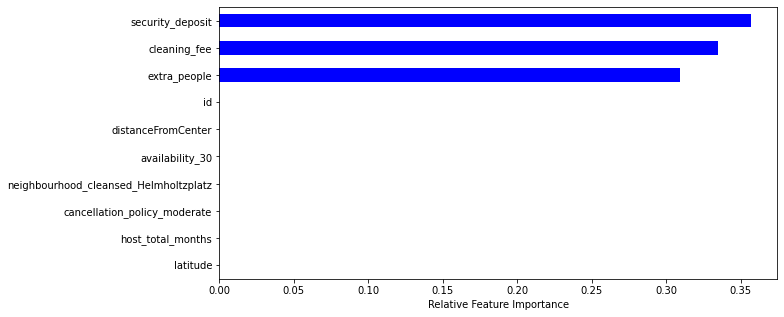

In [317]:
# plot the important features needed for Simple Model
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='Blue', figsize=(10,5))
plt.xlabel('Relative Feature Importance')

In [309]:
feat_importances.nlargest(20).sort_values()

availability_365                              7.312085e-07
availability_90                               8.147211e-07
calculated_host_listings_count                1.018270e-06
beds                                          1.182278e-06
neighbourhood_cleansed_Karl-Marx-Allee-Süd    1.413649e-06
number_of_reviews                             1.777331e-06
availability_60                               1.853093e-06
numberOfAmenities                             2.225154e-06
bedrooms                                      2.345631e-06
maximum_nights                                2.351139e-06
latitude                                      2.655853e-06
host_total_months                             2.708737e-06
cancellation_policy_moderate                  2.790810e-06
neighbourhood_cleansed_Helmholtzplatz         2.957047e-06
availability_30                               3.723957e-06
distanceFromCenter                            4.164925e-06
id                                            7.115069e-